In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from PIL import Image
from skimage import color
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('..\\input\\uw-madison-gi-tract-image-segmentation\\train.csv')
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [3]:
list_images = glob('..\\input\\uw-madison-gi-tract-image-segmentation\\train\\*\\*\\scans\\*.png')

In [4]:
image_details = pd.DataFrame({'Path':list_images})

splits = image_details['Path'].str.split("\\", n = 7, expand = True)
id_origin = splits[5]+'_'+splits[7]
id = id_origin.str[0:-22]
image_details['id'] = id

image_details.head()

,Path,id
0,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0001
1,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0002
2,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0003
3,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0004
4,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0005


In [5]:
image_with_all_mask = pd.merge(image_details,df,on = 'id')
image_with_all_mask.head(10)


,Path,id,class,segmentation
0,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0001,large_bowel,NaN
1,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0001,small_bowel,NaN
2,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0001,stomach,NaN
3,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0002,large_bowel,NaN
4,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0002,small_bowel,NaN
5,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0002,stomach,NaN
6,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0003,large_bowel,NaN
7,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0003,small_bowel,NaN
8,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0003,stomach,NaN
9,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0004,large_bowel,NaN


In [6]:
image_with_all_mask['large_bowel_mask'] = 0
image_with_all_mask['small_bowel_mask'] = 0
image_with_all_mask['stomach_mask'] = 0
for i in range(len(image_with_all_mask)):
    if image_with_all_mask.loc[i,'class'] == 'large_bowel':
        image_with_all_mask.loc[i,'large_bowel_mask'] = image_with_all_mask.loc[i,'segmentation']
        continue
    if image_with_all_mask.loc[i,'class'] == 'small_bowel':
        image_with_all_mask.loc[i-1,'small_bowel_mask'] = image_with_all_mask.loc[i,'segmentation']
        continue
    if image_with_all_mask.loc[i,'class'] == 'stomach':
        image_with_all_mask.loc[i-2,'stomach_mask'] = image_with_all_mask.loc[i,'segmentation']
        continue
image_with_all_mask.head()

,Path,id,class,segmentation,large_bowel_mask,small_bowel_mask,stomach_mask
0,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0001,large_bowel,NaN,NaN,NaN,NaN
1,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0001,small_bowel,NaN,0.0,0.0,0.0
2,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0001,stomach,NaN,0.0,0.0,0.0
3,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0002,large_bowel,NaN,NaN,NaN,NaN
4,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0002,small_bowel,NaN,0.0,0.0,0.0


In [7]:
train_df = image_with_all_mask.drop_duplicates(['id'])
train_df = train_df.drop(['class','segmentation'],axis = 1)
train_df = train_df.dropna(thresh = 3)
train_df.head()

,Path,id,large_bowel_mask,small_bowel_mask,stomach_mask
195,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0066,NaN,NaN,32107 5 32371 10 32635 13 32900 15 33165 17 33...
198,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0067,NaN,NaN,31313 2 31577 7 31841 10 32105 14 32369 17 326...
201,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0068,NaN,NaN,30517 2 30781 6 31046 9 31311 11 31575 15 3184...
204,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0069,NaN,NaN,29981 10 30246 13 30511 16 30776 19 31041 21 3...
207,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0070,NaN,NaN,28918 9 29182 14 29446 18 29711 21 29976 23 30...


In [8]:
train_df = train_df.reset_index(drop = True)
train_df.head()

,Path,id,large_bowel_mask,small_bowel_mask,stomach_mask
0,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0066,NaN,NaN,32107 5 32371 10 32635 13 32900 15 33165 17 33...
1,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0067,NaN,NaN,31313 2 31577 7 31841 10 32105 14 32369 17 326...
2,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0068,NaN,NaN,30517 2 30781 6 31046 9 31311 11 31575 15 3184...
3,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0069,NaN,NaN,29981 10 30246 13 30511 16 30776 19 31041 21 3...
4,..\input\uw-madison-gi-tract-image-segmentatio...,case101_day20_slice_0070,NaN,NaN,28918 9 29182 14 29446 18 29711 21 29976 23 30...


In [9]:
def get_pixel_loc(rle_string, img_shape):
  if(rle_string == 'nan'):
    return[(0,0)]
  rle = [int(i) for i in rle_string.split(' ')]
  pairs = list(zip(rle[0::2],rle[1::2]))

  # This for loop will help to understand better the above command.
  # pairs = []
  # for i in range(0, len(rle), 2):
  #   a.append((rle[i], rle[i+1])

  p_loc = []     #   Pixel Locations

  for start, length in pairs:
    for p_pos in range(start, start + length):
      p_loc.append((p_pos % img_shape[1], p_pos // img_shape[0]))
  
  return p_loc

In [10]:
def get_mask(mask, img_shape,class_name):
  canvas = np.zeros(img_shape).T
  if mask == [(0,0)]:
    return canvas.T
  elif class_name =='large_bowel_mask' :
    canvas[tuple(zip(*mask))] = 1
  elif class_name =='small_bowel_mask' :
    canvas[tuple(zip(*mask))] = 2
  elif class_name =='stomach_mask' :
    canvas[tuple(zip(*mask))] = 4
  # This is the Equivalent for loop of the above command for better understanding.
  # for pos in range(len(p_loc)):
  #   canvas[pos[0], pos[1]] = 1

  return canvas.T

In [11]:
def apply_mask(image, mask, img_shape,class_name):
  
  image = image / image.max()
  image = np.dstack((image, get_mask(mask, img_shape,class_name), get_mask(mask, img_shape,class_name)))

  return image

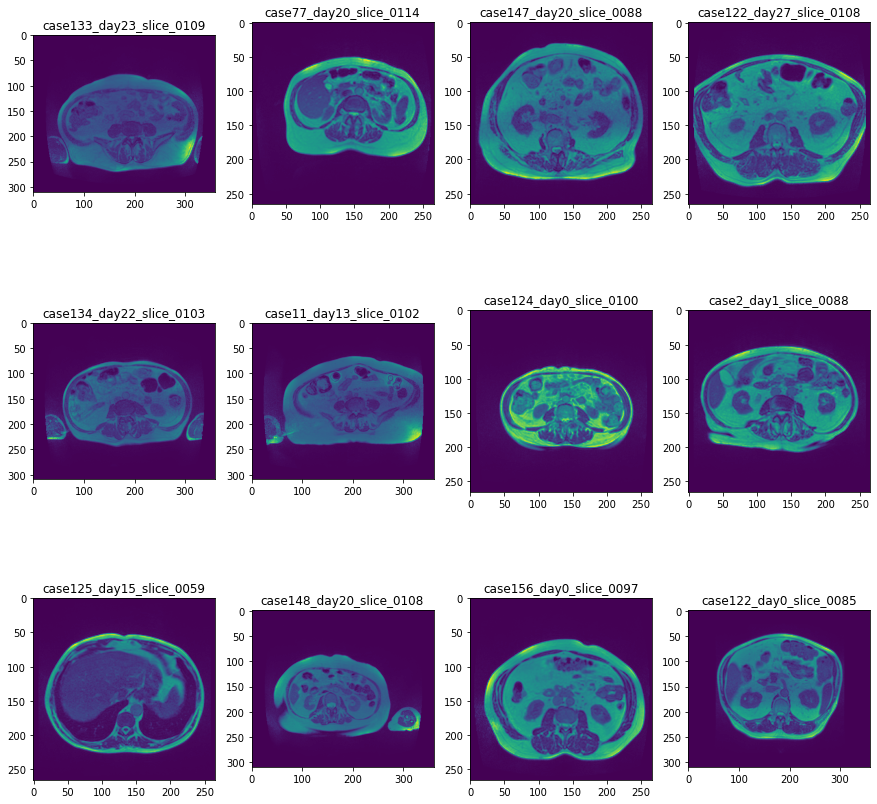

In [12]:
plt.subplots(figsize=(15,15))
for i in range(12):
  index = np.random.randint(0,train_df.shape[0])
  image = Image.open(train_df.loc[index, 'Path'])
  image = np.array(image)

  plt.subplot(3,4, i + 1)

  title = (train_df.loc[index, 'id'])

  plt.title(title)
  plt.imshow(np.interp(image, [np.min(image), np.max(image)], [0,255]))
  # plt.imshow(image / image.max())  #This will also serve the purpose.
  
plt.show()

In [13]:
input_array = []
mask_array = []
class_of_scan = ['large_bowel_mask','small_bowel_mask','stomach_mask']
def array_append(input_array,mask_array,train_df):
    for i in range(len(train_df)):
        index = i
        curr_id = train_df.loc[index,'id']
        image = np.array(Image.open(train_df.loc[index,'Path']))
        k = image.shape
        rle_string_lb = str(train_df.loc[index,'large_bowel_mask'])
        rle_string_sb = str(train_df.loc[index,'small_bowel_mask'])
        rle_string_st = str(train_df.loc[index,'stomach_mask'])
        
        p_loc_lb = get_pixel_loc(rle_string_lb,k)
        p_loc_sb = get_pixel_loc(rle_string_sb,k)
        p_loc_st = get_pixel_loc(rle_string_st,k)
        
        mask1 = get_mask(p_loc_lb,k,'large_bowel_mask')
        mask2 = get_mask(p_loc_sb,k,'small_bowel_mask')
        mask3 = get_mask(p_loc_st,k,'stomach_mask')

        mask = mask1+mask2+mask3

        input_array.append(image)
        mask_array.append(mask)
    return input_array,mask_array


In [14]:
input_array,mask_array = array_append(input_array,mask_array,train_df)

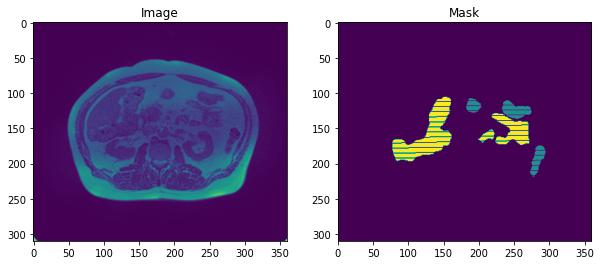

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].set_title('Image')
ax[0].imshow(input_array[1000])

ax[1].set_title('Mask')
ax[1].imshow(mask_array[1000])

plt.show()


In [16]:

# input_array contains(266,266),(276,276),(310,360)
# first use (266,266) for training

In [17]:
input_266 = []
mask_266 = []
for i in range(len(input_array)):
    if input_array[i].shape == (266,266):
        input_266.append(input_array[i])
        mask_266.append(mask_array[i])
input_266 = np.array(input_266,dtype=np.uint16)
mask_266 = np.array(mask_266,dtype=np.uint16)#too big, too much memory

input_266 = input_266[:100]
mask_266 = mask_266[:100]

print(input_266.shape)
print(mask_266.shape)


(1000, 266, 266)
(1000, 266, 266)


In [18]:
input_266 = np.expand_dims(input_266,axis=3)
print(np.unique(mask_266))
# 0 = background,

[0 1 2 3 4 5 6]


In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_266.shape  
mask_dataset_reshaped = mask_266.reshape(-1,1)
mask_dataset_reshaped_encoded = labelencoder.fit_transform(mask_dataset_reshaped)
mask_dataset_encoded = mask_dataset_reshaped_encoded.reshape(n, h, w)

print(mask_dataset_encoded.shape)
np.unique(mask_dataset_encoded)

(1000, 266, 266)


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [20]:
mask_dataset_encoded = np.expand_dims(mask_dataset_encoded, axis = 3)
print(mask_dataset_encoded.shape)

(1000, 266, 266, 1)


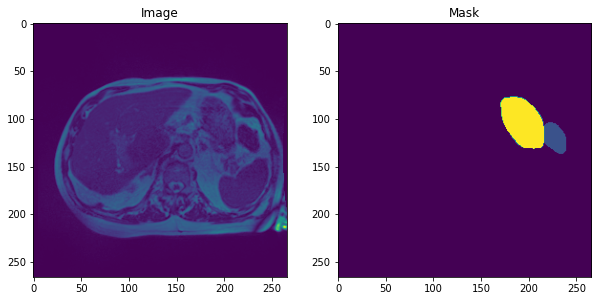

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].set_title('Image')
ax[0].imshow(input_266[15,:,:,0])

ax[1].set_title('Mask')
ax[1].imshow(mask_dataset_encoded[15,:,:,0])

plt.show()

In [22]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda,ZeroPadding2D

In [23]:
def unet_model(n_class = 7, height = 266 ,width = 266,channels = 1 ):
    inputs = Input((height,width,channels))
    x1 = Lambda(lambda x:x /255)(inputs)
    x1 = Conv2D(64,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(inputs)
    #x1 = Dropout(0.1)(x1)
    x1 = Conv2D(64,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(x1)
    p1 = MaxPooling2D(pool_size=(2,2))(x1)
    #266/2 = 133
    p1 = MaxPooling2D(pool_size=(2,2),strides=(1,1))(p1)
    #133-1 = 132

    x2 = Conv2D(128,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(p1)
    #x2 = Dropout(0.1)(x2)
    x2 = Conv2D(128,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(x2)
    p2 = MaxPooling2D((2,2))(x2)
    #132/2 = 66

    x3 = Conv2D(256,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(p2)
    #x3 = Dropout(0.1)(x3)
    x3 = Conv2D(256,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(x3)
    p3 = MaxPooling2D((2,2))(x3)
    #66/2 = 33
    p3 = MaxPooling2D(pool_size=(2,2),strides=(1,1))(p3)
    #33-1 = 32

    x4 = Conv2D(512,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(p3)
    #x4 = Dropout(0.1)(x4)
    x4 = Conv2D(512,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(x4)
    p4 = MaxPooling2D((2,2))(x4)
    #33/2 = 16

    x5 = Conv2D(1024,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(p4)
    #x5 = Dropout(0.1)(x5)
    x5 = Conv2D(1024,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(x5)
#decompose:
    y5 = Conv2DTranspose(128,(2,2),strides = (2,2),padding='same')(x5)
    #16*2 = 32
    y5 = concatenate([y5,x4])
    q5 = Conv2D(512,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(y5)
    #q5 = Dropout(0.1)(q5)
    q5 = Conv2D(512,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(q5)

    y4 = Conv2DTranspose(64,(3,3),strides = (2,2),padding='same')(q5)
    #32*2 = 64
    y4 = ZeroPadding2D(padding=(1,1))(y4)
    #64+2 = 66
    y4 = concatenate([y4,x3])
    q4 = Conv2D(256,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(y4)
    #q4 = Dropout(0.1)(q4)
    q4 = Conv2D(256,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(q4)

    y3 = Conv2DTranspose(32,(3,3),strides = (2,2),padding='same')(q4)
    #66*2 = 132
    y3 = concatenate([y3,x2])
    q3 = Conv2D(128,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(y3)
    #q3 = Dropout(0.1)(q3)
    q3 = Conv2D(128,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(q3)

    y2 = Conv2DTranspose(16,(3,3),strides = (2,2),padding='same')(q3)
    #132*2 = 264
    y2 = ZeroPadding2D(padding=(1,1))(y2)
    #264+2 = 266
    y2 = concatenate([y2,x1])
    q2 = Conv2D(64,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(y2)
    #q2 = Dropout(0.1)(q2)
    q2 = Conv2D(64,(3,3),kernel_initializer='he_normal',activation='relu',padding='same')(q2)

#to mutil_segmentation, activation function use softmax
    outputs = Conv2D(n_class,(1,1),activation='softmax')(q2)
    model = Model(inputs = [inputs],outputs = [outputs])

    return model

In [24]:
model = unet_model(7,266,266,1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 266, 266, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 266, 266, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 266, 266, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_266,mask_dataset_encoded,test_size = 0.2)

In [26]:
print(x_train.shape)
print(y_train.shape)


(800, 266, 266, 1)
(800, 266, 266, 1)


In [27]:
from tensorflow.keras.utils import to_categorical
y_train_multi = to_categorical(y_train, 7)
y_train_final = y_train_multi.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], 7))


y_test_multi = to_categorical(y_test, 7)
y_test_final = y_test_multi.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], 7))

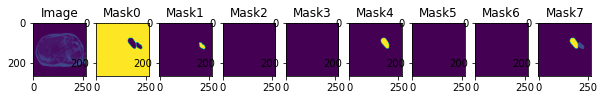

In [28]:
fig, ax = plt.subplots(1,9, figsize=(10,10))
ax[0].set_title('Image')
ax[0].imshow(x_train[15,:,:,0])

ax[1].set_title('Mask0')
ax[1].imshow(y_train_final[15,:,:,0])

ax[2].set_title('Mask1')
ax[2].imshow(y_train_final[15,:,:,1])
ax[3].set_title('Mask2')
ax[3].imshow(y_train_final[15,:,:,2])
ax[4].set_title('Mask3')
ax[4].imshow(y_train_final[15,:,:,3])
ax[5].set_title('Mask4')
ax[5].imshow(y_train_final[15,:,:,4])
ax[6].set_title('Mask5')
ax[6].imshow(y_train_final[15,:,:,5])
ax[7].set_title('Mask6')
ax[7].imshow(y_train_final[15,:,:,6])

ax[8].set_title('Mask7')
ax[8].imshow(y_train[15,:,:,0])
plt.show()

In [29]:
model.fit(x_train,y_train_final,epochs=50,batch_size=16,shuffle=True,validation_data=(x_test,y_test_final))

Epoch 1/50
25/25 [==============================] - 453s 18s/step - loss: 106.5165 - accuracy: 0.8354 - val_loss: 14.3473 - val_accuracy: 0.8806
Epoch 2/50
25/25 [==============================] - 431s 17s/step - loss: 5.7521 - accuracy: 0.8748 - val_loss: 1.4514 - val_accuracy: 0.9043
Epoch 3/50
25/25 [==============================] - 429s 17s/step - loss: 1.0885 - accuracy: 0.9259 - val_loss: 0.9278 - val_accuracy: 0.9346
Epoch 4/50
25/25 [==============================] - 437s 18s/step - loss: 0.8946 - accuracy: 0.9378 - val_loss: 0.9040 - val_accuracy: 0.9360
Epoch 5/50
25/25 [==============================] - 398s 16s/step - loss: 0.7749 - accuracy: 0.9399 - val_loss: 0.6093 - val_accuracy: 0.9408
Epoch 6/50
25/25 [==============================] - 392s 16s/step - loss: 0.7273 - accuracy: 0.9413 - val_loss: 0.6007 - val_accuracy: 0.9409
Epoch 7/50
25/25 [==============================] - 388s 16s/step - loss: 0.7116 - accuracy: 0.9420 - val_loss: 0.6581 - val_accuracy: 0.9415
Epo

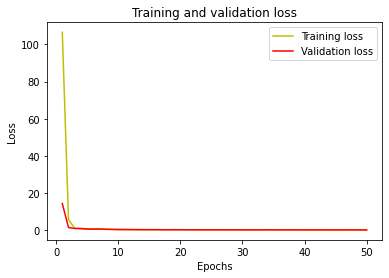

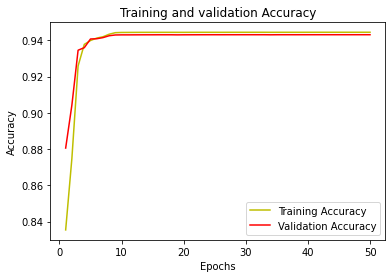

In [30]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
test_index = 60
x_test[test_index].shape
x_test1 = np.expand_dims(x_test[test_index],axis=0)
print(x_test1.shape)

(1, 266, 266, 1)


In [35]:
y_pred = model.predict(x_test1)
print(y_pred.shape)

(1, 266, 266, 7)


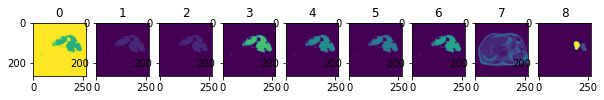

In [36]:
fig, ax = plt.subplots(1,9, figsize=(10,10))
ax[0].set_title('0')
ax[0].imshow(y_pred[0,:,:,0])

ax[1].set_title('1')
ax[1].imshow(y_pred[0,:,:,1])
ax[2].set_title('2')
ax[2].imshow(y_pred[0,:,:,2])
ax[3].set_title('3')
ax[3].imshow(y_pred[0,:,:,3])
ax[4].set_title('4')
ax[4].imshow(y_pred[0,:,:,4])
ax[5].set_title('5')
ax[5].imshow(y_pred[0,:,:,5])
ax[6].set_title('6')
ax[6].imshow(y_pred[0,:,:,6])

ax[7].set_title('7')
ax[7].imshow(x_test1[0,:,:,0])

ax[8].set_title('8')
ax[8].imshow(y_test[test_index,:,:,0])